![title](kctdeploylogos.jpg)

# DEPLOY  TEAM  KGT

## Team Kevin, Thomas and Captain

## Kickstater Precict for Notebook, Flask and Docker Deploy 

## STEP IMPORTS

In [46]:
import os
import pandas as pd
import numpy as np
import zipfile
import time
import matplotlib.pyplot as plt
import re
import seaborn as sns

%matplotlib inline

## LOAD

In [47]:
# THIS COMBINE FROM 2020 DATA
df = pd.read_csv('./data/kctkick2020combine.csv')

## CLEANING


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204681 entries, 0 to 204680
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   backers_count             204681 non-null  object
 1   blurb                     204673 non-null  object
 2   category                  204680 non-null  object
 3   converted_pledged_amount  204680 non-null  object
 4   country                   204680 non-null  object
 5   country_displayable_name  204680 non-null  object
 6   created_at                204680 non-null  object
 7   creator                   204680 non-null  object
 8   currency                  204680 non-null  object
 9   currency_symbol           204680 non-null  object
 10  currency_trailing_code    204680 non-null  object
 11  current_currency          204680 non-null  object
 12  deadline                  204680 non-null  object
 13  disable_communication     204680 non-null  object
 14  frie

In [49]:
#   FRIENDS PERMISSIONS IS_STARRED  IS_BACKING  HAS MANY NULLS, DELETE

In [50]:
# NULL COLUMNS?
df.drop(labels=['friends','is_backing','is_starred','permissions'],axis=1,inplace=True)

In [51]:
# NULL ROWS?
df.dropna(axis=0, how='any',inplace=True)
len(df)

204304

In [52]:
df.state.unique()

array(['successful', 'failed', 'live', 'canceled', 'state'], dtype=object)

In [53]:
# DUPLICATES?
dups = df[df.duplicated(subset='id',keep=False)==True].copy()
print('Number of duplicated project IDs:', len(dups.groupby('id')))

Number of duplicated project IDs: 23768


In [54]:
# DROP DUPLICATES
df = df[df.duplicated(subset='id',keep=False)==False].copy()
len(df)

156715

In [55]:
# ONLY SUCESSFUL ONES
df = df[(df['state']=='successful') | (df['state']=='failed')].copy()
len(df)

147238

In [56]:
# CHANGE TO PROJECTSUCCES THEN USE STATE
df.rename(columns={'state':'project_success'},inplace=True)
df['project_success'] = np.where(df['project_success']=='successful', 1, 0)

State Percentual in %: 
1    51.94
0    48.06
Name: project_success, dtype: float64


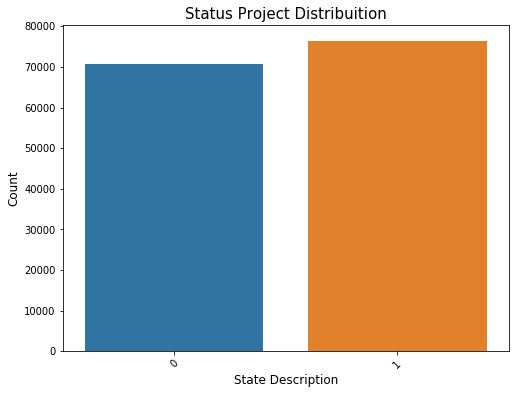

In [57]:
# PLOT STATE PERPETUAL

percentual_sucess = round(df["project_success"].value_counts() / len(df["project_success"]) * 100,2)

print("State Percentual in %: ")
print(percentual_sucess)

plt.figure(figsize = (8,6))

ax1 = sns.countplot(x="project_success", data=df)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.set_title("Status Project Distribuition", fontsize=15)
ax1.set_xlabel("State Description", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

plt.show()

In [58]:
df[['created_at','deadline','launched_at','state_changed_at']].head(3)

,created_at,deadline,launched_at,state_changed_at
0,1541608918,1556654150,1554062150,1556654150
1,1377505616,1382136005,1378248005,1382136006
2,1424288631,1426952928,1424364528,1426952931


In [59]:
print(df.created_at.min())
print(df.created_at.max())

1240366270
1586304575


## COUNTS

In [60]:
df.category.value_counts()

{"id":272,"name":"Mobile Games","slug":"games/mobile games","position":3,"parent_id":12,"parent_name":"Games","color":51627,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/games/mobile%20games"}}}               2383
{"id":273,"name":"Playing Cards","slug":"games/playing cards","position":4,"parent_id":12,"parent_name":"Games","color":51627,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/games/playing%20cards"}}}            2344
{"id":53,"name":"Public Art","slug":"art/public art","position":9,"parent_id":1,"parent_name":"Art","color":16760235,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/art/public%20art"}}}                          2344
{"id":36,"name":"Classical Music","slug":"music/classical music","position":3,"parent_id":14,"parent_name":"Music","color":10878931,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/music/classical%20music"}}}    2319
{"id":342,"name":"Web","slug":"t

In [61]:
# CONVERT
df_main_cat_countss = df.category.value_counts().reset_index()
df_main_cat_countss.columns = ['category','count']
df_main_cat_countss

,category,count
0,"{""id"":272,""name"":""Mobile Games"",""slug"":""games/...",2383
1,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",2344
2,"{""id"":53,""name"":""Public Art"",""slug"":""art/publi...",2344
3,"{""id"":36,""name"":""Classical Music"",""slug"":""musi...",2319
4,"{""id"":342,""name"":""Web"",""slug"":""technology/web""...",2312
...,...,...
164,"{""id"":395,""name"":""Social Practice"",""slug"":""art...",43
165,"{""id"":386,""name"":""Comedy"",""slug"":""music/comedy...",43
166,"{""id"":317,""name"":""Chiptune"",""slug"":""music/chip...",42
167,"{""id"":255,""name"":""Residencies"",""slug"":""dance/r...",23


In [62]:
# CHECK CREATOR
df.loc[1]['creator']

'{"id":1097916022,"name":"Sabrina  Montgomery","slug":"sabrinamontgomery","is_registered":null,"chosen_currency":null,"is_superbacker":null,"avatar":{"thumb":"https://ksr-ugc.imgix.net/assets/007/803/708/70590492019c211894fe97c5f394c98e_original.JPG?ixlib=rb-2.1.0&w=40&h=40&fit=crop&v=1461480580&auto=format&frame=1&q=92&s=3e748cca1794239f3e6da0fa69c41899","small":"https://ksr-ugc.imgix.net/assets/007/803/708/70590492019c211894fe97c5f394c98e_original.JPG?ixlib=rb-2.1.0&w=160&h=160&fit=crop&v=1461480580&auto=format&frame=1&q=92&s=2ff6b15932168f4680950be66f23fffc","medium":"https://ksr-ugc.imgix.net/assets/007/803/708/70590492019c211894fe97c5f394c98e_original.JPG?ixlib=rb-2.1.0&w=160&h=160&fit=crop&v=1461480580&auto=format&frame=1&q=92&s=2ff6b15932168f4680950be66f23fffc"},"urls":{"web":{"user":"https://www.kickstarter.com/profile/sabrinamontgomery"},"api":{"user":"https://api.kickstarter.com/v1/users/1097916022?signature=1587095059.b5535098a7dcd8dbae3587ad510b4ee6735a70a8"}}}'

In [63]:
# CREATOR ID
df['creator_id'] = [re.match(r'.+("id":)(\d+,).+',creator).group(2).replace(',','') 
                    for creator in df['creator']]

In [64]:
creator_dups = df[df.duplicated(subset='creator_id',keep=False)==True].copy()
print('Number of duplicated project IDs:', len(creator_dups.groupby('creator_id')))

Number of duplicated project IDs: 10598


In [65]:

df.sort_values(by=['creator_id','launched_at'],inplace=True)

df['proj_num_by_creator'] = df.groupby(['creator_id']).cumcount()+1

In [66]:
df['proj_num_by_creator'].describe()

count    147238.000000
mean          1.276077
std           1.422409
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          63.000000
Name: proj_num_by_creator, dtype: float64

In [67]:
# BINARY VALUE
df['first_time_proj'] = np.where(df['proj_num_by_creator']==1, 1, 0)

In [68]:
# THE RANGE
df['goal'].describe()

count     147238
unique      4613
top         5000
freq       10875
Name: goal, dtype: object

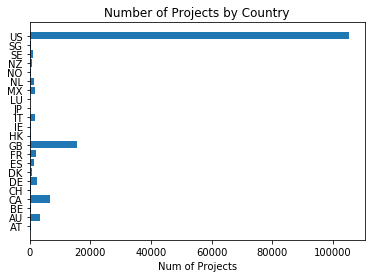

In [69]:
# BY COUNTRY?
project_by_country = df.groupby(by='country')['id'].count()

plt.barh(project_by_country.index,project_by_country.values)
plt.xlabel('Num of Projects')
plt.title('Number of Projects by Country');

In [70]:
# US ONLY
df = df[df['country']=='US'].copy()
df.drop('country',axis=1,inplace=True)
len(df)

105153

In [71]:

df['country_check'] = [re.match(r'.+("country":)("\w\w").+', loc_string).group(2).replace('"','') for loc_string in df['location']]
df = df[df['country_check']=='US'].copy()
df.drop('country_check',axis=1,inplace=True)
len(df)

101430

In [72]:
# US COLUMN
df['state'] = [re.match(r'.+("state":)("\w+").+', loc_string).group(2).replace('"','') 
               for loc_string in df['location']]

df.state.unique()

array(['PA', 'NY', 'CA', 'TX', 'IL', 'MI', 'DC', 'NC', 'MA', 'FL', 'KY',
       'OH', 'SC', 'WI', 'UT', 'GA', 'ME', 'WA', 'AL', 'OR', 'CT', 'AR',
       'SD', 'TN', 'VA', 'MD', 'OK', 'LA', 'VT', 'IA', 'NJ', 'CO', 'NV',
       'MO', 'MN', 'MT', 'AZ', 'NH', 'IN', 'AK', 'ID', 'WV', 'HI', 'NM',
       'KS', 'ND', 'MS', 'DE', 'RI', 'WY', 'NE'], dtype=object)

In [73]:

df.loc[2109,'category']

'{"id":30,"name":"Documentary","slug":"film & video/documentary","position":4,"parent_id":11,"parent_name":"Film & Video","color":16734574,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/film%20&%20video/documentary"}}}'

In [74]:

df['gen_category'] = [cat_string.split('"')[-2].split('/')[0] for cat_string in df['category']]
df['gen_category'].unique()

array(['http:'], dtype=object)

In [75]:

df['sub_category'] = [cat_string.split('"')[-2].split('/')[-1] for cat_string in df['category']]
df['sub_category'].unique()

array(['performance%20art', 'plays', 'digital%20art', 'fiction',
       'young%20adult', 'restaurants', 'nature', 'action', 'pop',
       'country%20&%20folk', 'workshops', 'blues', 'farms',
       'food%20trucks', 'television', 'fantasy', 'gaming%20hardware',
       'comedy', 'dance', 'art%20books', 'hardware', 'vegan',
       'stationery', 'hip-hop', 'woodworking', 'graphic%20novels',
       'illustration', 'art', 'public%20art', 'live%20games',
       'video%20games', 'conceptual%20art', 'journalism', 'faith',
       'electronic%20music', 'print', 'shorts', 'musical', 'web', 'rock',
       'diy', 'sculpture', 'tabletop%20games', 'mobile%20games', 'drinks',
       'small%20batch', 'candles', 'classical%20music', 'gadgets',
       'people', 'latin', 'nonfiction', 'webseries', 'horror',
       'music%20videos', 'playing%20cards', "children's%20books",
       'spaces', 'wearables', 'indie%20rock', 'thrillers', 'drama',
       'product%20design', 'interactive%20design', 'accessories',
  

In [76]:

df.drop(labels=['category'],axis=1,inplace=True)

In [77]:
# CHECK EACH COLUMN VARIANCE

df_cols = list(df.columns)

for c in df_cols:
    print(c, len(set(df[c])))

backers_count 2450
blurb 100833
converted_pledged_amount 22799
country_displayable_name 1
created_at 101404
creator 101184
currency 1
currency_symbol 1
currency_trailing_code 1
current_currency 1
deadline 96382
disable_communication 1
fx_rate 1
goal 3448
id 101430
is_starrable 1
launched_at 101383
location 11316
name 101208
photo 101423
pledged 28294
profile 101430
slug 101430
source_url 164
spotlight 2
staff_pick 2
project_success 2
state_changed_at 96655
static_usd_rate 1
urls 101430
usd_pledged 28294
usd_type 1
creator_id 89320
proj_num_by_creator 63
first_time_proj 2
state 51
gen_category 1
sub_category 159


In [78]:

df[['converted_pledged_amount','usd_pledged']].corr()

""


In [79]:
df.columns

Index(['backers_count', 'blurb', 'converted_pledged_amount',
       'country_displayable_name', 'created_at', 'creator', 'currency',
       'currency_symbol', 'currency_trailing_code', 'current_currency',
       'deadline', 'disable_communication', 'fx_rate', 'goal', 'id',
       'is_starrable', 'launched_at', 'location', 'name', 'photo', 'pledged',
       'profile', 'slug', 'source_url', 'spotlight', 'staff_pick',
       'project_success', 'state_changed_at', 'static_usd_rate', 'urls',
       'usd_pledged', 'usd_type', 'creator_id', 'proj_num_by_creator',
       'first_time_proj', 'state', 'gen_category', 'sub_category'],
      dtype='object')

## OBSERVATIONS

### CATEGORIES

In [80]:
print('Number of gen categoreis: ', len(np.unique(df['gen_category'])))
print('Number of sub categoreis: ', len(np.unique(df['sub_category'])))

Number of gen categoreis:  1
Number of sub categoreis:  159


In [81]:
# GET gen_categories
gen_categories = list(set(df['gen_category']))

In [82]:

df = pd.get_dummies(df, columns=['gen_category'], prefix='category')
df.rename(columns={'category_film & video':'category_film_n_video'},inplace=True)

In [83]:
df.columns

Index(['backers_count', 'blurb', 'converted_pledged_amount',
       'country_displayable_name', 'created_at', 'creator', 'currency',
       'currency_symbol', 'currency_trailing_code', 'current_currency',
       'deadline', 'disable_communication', 'fx_rate', 'goal', 'id',
       'is_starrable', 'launched_at', 'location', 'name', 'photo', 'pledged',
       'profile', 'slug', 'source_url', 'spotlight', 'staff_pick',
       'project_success', 'state_changed_at', 'static_usd_rate', 'urls',
       'usd_pledged', 'usd_type', 'creator_id', 'proj_num_by_creator',
       'first_time_proj', 'state', 'sub_category', 'category_http:'],
      dtype='object')

In [84]:
df.to_csv('./data/final_kickstarter_data.csv')

## MODELING

In [85]:
from sklearn import naive_bayes
from sklearn import pipeline, preprocessing, neighbors, model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

In [86]:
# CHANGE TO PROJECTSUCCES THEN USE STATE
df.rename(columns={'state':'project_success'},inplace=True)
df['project_success'] = np.where(df['project_success']=='successful', 1, 0)

C:\Users\Captain\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [87]:
# create X and y variables
X = df.select_dtypes(exclude=object).drop('project_success',axis=1).copy()
y = df['project_success']

In [88]:
# experimentation setup

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)


# transformation
scaler = preprocessing.StandardScaler()

# set cross-validation method
kfold = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=101)

In [89]:
# create a function to generate scaled X features
def get_X_std(train_set, test_set, feature_list):
    
    X_trn = train_set[feature_list]  
    X_tst = test_set[feature_list]
    
    X_train_std = scaler.fit_transform(X_trn)
    X_test_std = scaler.transform(X_tst)
    return(X_train_std, X_test_std)

### ESTABLISH BASE

In [ ]:
# create a dataframe to keep track of all scores
model_results = pd.DataFrame(columns=['model','test_accuracy'])

def fill_in_res(model_name, test_accuracy):
    model_results.loc[len(model_results)]=[model_name,round(test_accuracy,3)] 
    return(model_results)

In [ ]:
fill_in_res('Baseline', 0.537)